# Ex 2.3.3

In [31]:
from matplotlib import pyplot as plt
import numpy as np

## (a)
The formula is $$g(z) = \sum_{k=0}^\infty {1 \over z^{k+1}}\tau(A^k).$$ $\tau(A^0) = 1$, and we're told $\tau(A^k) = {1 \over k}$, so $$ g(z) = {1 \over z} + \sum_{k=1}{1 \over z^{k+1}}{1 \over k},$$ which simplifes to $$ \boxed{g(z) = {1 \over z}\left[1 + \sum_{k=1}^\infty {1 \over z^k} {1 \over k}\right].}$$

## (b)
Taylor series of $f(x) = \log(1 + x)$ at $x = 0$: $f(0) = 0$, and the derivatives are $$f'(x) = (1 + x)^{-1}, \quad f''(x) = -1(1 +x)^{-2}, \dots \implies f^k(x) = (-1)^{k+1}(1+x)^{-k} (k-1)!.$$ So the Taylor series at $x = 0$ is $$ \log(1+x) = \sum_{k=1} ^\infty {f^k(0) \over k!} x^k = \sum_{k=1} (-1)^{k+1} {(k-1)! \over k!} x^k = - \sum_{k=1} {(-x)^{k} \over k}.$$ To get rid of the minus sign on $x$ we flip it in the log, to get $$\log(1 - x) = - \sum_{k=1}^\infty x^k (k - 1)!,$$ and get rid of the remaining minus sign by inverting the argument, to arrive at $$ \log {1 \over 1 - x} = \sum_{k=1}^\infty {x^k \over k}.$$ 

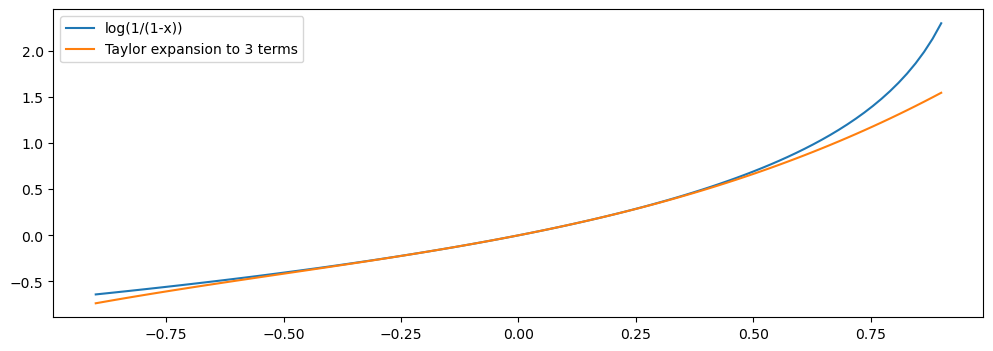

In [32]:
x_vals = np.linspace(-0.9, 0.9,100).reshape(1, -1)
k_vals = np.arange(1, 4).reshape(-1, 1)
f_tay  = np.sum((x_vals[None, :] ** k_vals[:, None])/k_vals[:, None], axis=0).flatten() 
f      = np.log(1/(1-x_vals)).flatten()
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(x_vals.flatten(), f, label='log(1/(1-x))')
ax.plot(x_vals.flatten(), f_tay, label=f'Taylor expansion to {len(k_vals)} terms')
ax.legend()

Then $$\boxed{g(z) = {1 \over z}\left[1 + \log{1 \over 1 - {1 \over z}}\right] =  {1 \over z}\log{e \over 1 - {1 \over z}}.}$$

In [26]:
g = lambda z: 1/z * np.log(np.e/(1 - 1/z))
g_tay = lambda z, k: (1 + sum([z**(-i)/i for i in range(1, k+1)]))/z
assert np.allclose(g(1 + 2j), g_tay(1 + 2j, 100))

## (c)
The singularities of $g(z)$ on the real axis are at $z = 0$ and $z = 1$.

## (d)
$$\begin{align*} g(x - i \eta ) &= {1 \over x - i \eta} \log {e \over 1 - {1 \over x - i \eta}} \\ &= {x + i \eta \over x^2 + \eta^2} + {x + i \eta \over x^2  + \eta^2} \log (x - i \eta) - {x + i \eta \over x^2 + \eta^2} \log(x - 1 - i \eta).\end{align*}$$

The imaginary part of this is going to have three contributions:
1. The first term, which will go to zero because of $\eta$ in the numerator.
2. The second term, which will contribute ${x \over x^2 + \eta^2} \text{arg}(x - i \eta).$
3. The third term, which will contribute ${x \over x^2 + \eta^2} \text{arg}(x - 1 - i \eta).$

We'll make a branch cut on $x = [0, 1]$.
Taking the limit of the first part, we get $$ \lim_{\eta \to 0^+} {x \over x^2 + \eta^2} \text{arg}(x - i\eta) = 0.$$
Taking the limit of the second part we get$$ \lim_{\eta \to 0^+} {x \over x^2 + \eta^2} \text{arg}(x -1 - i\eta) = -{\pi \over x}.$$
This is because the $-1$ in the argument makes the real part of the argument negative. 
Combining these pieces, we get $$ \lim_{\eta \to 0^+} g(x - i \eta) = {\pi \over x} = \pi \rho(x).$$
So we've determined the density as $$\rho(x) = {1 \over x} \quad x \in [0, 1].$$ 

### Using $\tau(A^k) = (k+1)^{-1}$
Our density above seems incorrect, since it doesn't integrate because of the singularity at 0.
ChatGPT checked my algebra, and confirmed this. 
It suggested that they stated the moments wrong, that it should instead be $\tau(A^k) = {1 \over k+1}.$

In that case, things simplify, and we get $$g(z) = \sum_{k=1}^\infty {1 \over k z^k} = \log{1 \over 1 - {1 \over z}}.$$

As before, this has two singularities, at $z=0$ and $z=1$. So we'll put the branch cut on the same interval as before, $[0, 1]$.

We've already done the work of computing the limits we need - the important term will be the third one above, and it's now simplified to not have the coefficient $x/(x^2+ \eta^2)$. The limit then becomes $$\lim_{\eta \to 0^+} g(x - i \eta) = \pi \implies \rho(x) = 1,$$ which is a valid density. 

Given the simplicity of the answer, we'll assume this is the correct solution.

## (e)
The moments for our $\rho(x)$ above are $$ \tau(A^k) = \int_0^1 \lambda^k \rho(\lambda) d\lambda = {1 \over k+1 } \left. \lambda^k \right|_0^1 = {1 \over k + 1}.$$ This matches the (corrected) values of the given moments.